In [71]:
#Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import math
import seaborn as sns
import plotly.graph_objects as go
import pandas_profiling
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from IPython.display import Image  
import graphviz
import pydotplus
from sklearn import tree
import plotly.offline as py#visualization
import datetime
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from tableone import TableOne
import sidetable
import os
# libraries
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
os.environ["PATH"] += os.pathsep + 'C:/Users/Guillermo/anaconda3_2020/Library/bin/graphviz/'


In [53]:
#data_ifn = pd.read_excel(r"C:\Users\g.arguello.gonzalez\Documents\Master Data Science UOC\TFM\Datos\excelIFN.xlsx")

data_ifn = pd.read_excel(r"C:\Users\Guillermo\Documents\TFM\TFM\Datos\excelinterferoncitoquines_complet1612.xlsx")

data_ifn = data_ifn.dropna(axis=1, how='all')


data_ifn.loc[data_ifn['CLINICA'].str.contains('GREU'), "CLINICA_NUM"] = 0
data_ifn.loc[data_ifn['CLINICA'].str.contains('PLANTA'), "CLINICA_NUM"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains(' LLEU'), "CLINICA_NUM"] = 2
data_ifn.loc[data_ifn['CLINICA'].str.contains('ASSIMPTOMATIC'), "CLINICA_NUM"] = 3
data_ifn.loc[data_ifn['CLINICA'].str.contains('CONTROL'), "CLINICA_NUM"] = 4

data_ifn.loc[data_ifn['CLINICA'].str.contains('Greu'), "CLINICA_NUM"] = 0
data_ifn.loc[data_ifn['CLINICA'].str.contains('Planta'), "CLINICA_NUM"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('Moderat'), "CLINICA_NUM"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('Lleu'), "CLINICA_NUM"] = 2
data_ifn.loc[data_ifn['CLINICA'].str.contains('Assimptomàtic'), "CLINICA_NUM"] = 3
data_ifn.loc[data_ifn['CLINICA'].str.contains('Control'), "CLINICA_NUM"] = 4


data_ifn.loc[data_ifn['EDAD'].str.contains('PEDIATRIC'), "EDAD_NUM"] = 0
data_ifn.loc[data_ifn['EDAD'].str.contains('ADULT'), "EDAD_NUM"] = 1
data_ifn.loc[data_ifn['EDAD'].str.contains('GESTANT'), "EDAD_NUM"] = 1
data_ifn.loc[data_ifn['EDAD'].str.contains('ND'), "EDAD_NUM"] = 1


data_ifn["EDAD_CLINICA"] = data_ifn['EDAD'] + " " + data_ifn['CLINICA']

data_ifn.loc[data_ifn["EDAD_CLINICA"] == "PEDIATRIC COVID+ ASSIMPTOMATIC", 
             "EDAD_CLINICA"] = "PEDIATRIC COVID+ ASSIMPTOMATIC/LLEU"

data_ifn.loc[data_ifn["EDAD_CLINICA"] == "PEDIATRIC COVID+ LLEU", 
             "EDAD_CLINICA"] = "PEDIATRIC COVID+ ASSIMPTOMATIC/LLEU"

data_ifn.loc[data_ifn['CLINICA'].str.contains('GREU'), "CLINICA_BIN"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('PLANTA'), "CLINICA_BIN"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('LLEU'), "CLINICA_BIN"] = 0
data_ifn.loc[data_ifn['CLINICA'].str.contains('ASSIMPTOMATIC'), "CLINICA_BIN"] = 0
data_ifn.loc[data_ifn['CLINICA'].str.contains('CONTROL'), "CLINICA_BIN"] = 0


data_ifn.loc[data_ifn['CLINICA'].str.contains('Greu'), "CLINICA_BIN"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('Planta'), "CLINICA_BIN"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('Moderat'), "CLINICA_BIN"] = 1
data_ifn.loc[data_ifn['CLINICA'].str.contains('Lleu'), "CLINICA_BIN"] = 0
data_ifn.loc[data_ifn['CLINICA'].str.contains('Assimptomàtic'), "CLINICA_BIN"] = 0
data_ifn.loc[data_ifn['CLINICA'].str.contains('Control'), "CLINICA_BIN"] = 0

data_ifn = data_ifn[data_ifn['28G'].notna()]

data_ifn.loc[data_ifn['CLINICA_BIN'] == 0, "SEVERITY"] = "Mild symptoms/asymptomatic"
data_ifn.loc[data_ifn['CLINICA_BIN'] == 1, "SEVERITY"] = "Severe symptoms"
data_ifn.loc[data_ifn['CLINICA_BIN'] == 2, "SEVERITY"] = "Moderate symptoms"

#data_ifn = data_ifn.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2','ID','Unnamed: 6'])

C:\Users\Guillermo\anaconda3_2020\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\Users\Guillermo\anaconda3_2020\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.

C:\Users\Guillermo\anaconda3_2020\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning:

This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.



In [3]:
data_ifn

,ID_PACIENTE,CLINICA,EDAD,28G,6G,RATIO3/25,MAX,MIN,CXCL10,DDX60,...,IL-10,IL-18,MCP-1,MCP-3,TNF-alpha,CLINICA_NUM,EDAD_NUM,EDAD_CLINICA,CLINICA_BIN,SEVERITY
0,COVID-958,Greu,PEDIATRIC,5.680000,3.860000,0.100000,16.650000,-0.170000,4.160000,8.310000,...,252.261226,2989.174668,9577.675096,177.440168,79.631427,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms
1,COVID-1033,Greu,PEDIATRIC,-0.630000,-0.450000,0.160000,1.260000,-1.140000,1.260000,-0.750000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms
2,COVID-658,Greu,PEDIATRIC,0.580000,0.200000,0.190000,6.820000,-2.740000,0.790000,1.300000,...,195.633810,3437.374617,844.115603,58.200000,29.141304,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms
3,COVID-3410,Greu,PEDIATRIC,-0.559296,-0.472989,1.313128,-1.413937,0.116345,1.313128,-0.681973,...,4.000000,130.712943,297.152384,58.200000,2.122418,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms
4,COVID-246,Moderat,PEDIATRIC,-0.250000,-0.180000,0.080000,13.740000,-0.840000,1.980000,-0.420000,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,PEDIATRIC Moderat,2.0,Moderate symptoms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,COVID-603,Control,ADULT,-0.560000,-0.500000,0.130000,1.310000,-1.680000,1.310000,-0.550000,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic
71,COVID-379,Control,ADULT,0.140000,0.070000,0.140000,3.450000,-0.790000,3.450000,0.420000,...,4.000000,286.054819,155.781993,58.200000,2.479498,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic
72,COVID-380,Control,ADULT,0.130000,0.030000,0.110000,2.240000,-0.470000,2.240000,0.190000,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic
73,COVID-376,Control,ADULT,-0.560000,-0.560000,0.140000,1.080000,-1.240000,1.080000,-0.040000,...,4.000000,373.170847,355.783770,58.200000,4.991038,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic


In [4]:
data_ifn.stb.freq(["EDAD","CLINICA"],style=True, cum_cols=False)



,EDAD,CLINICA,count,percent
0,ADULT,Control,12,18.18%
1,PEDIATRIC,Assimptomàtic,10,15.15%
2,ADULT,Greu,10,15.15%
3,PEDIATRIC,Lleu,9,13.64%
4,ADULT,Assimptomàtic,8,12.12%
5,ADULT,Lleu,7,10.61%
6,PEDIATRIC,Moderat,5,7.58%
7,PEDIATRIC,Greu,4,6.06%
8,ADULT,Moderat,1,1.52%


In [5]:
columns = ["CXCL10","DDX60","EPSTI1","GBP1","HERC5","HERC6","IFI27","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFIT5","ISG15","LAMP3","LY6E","MX1","OAS1","OAS2","OAS3","OASL","RSAD2","RTP4","SIGLEC1","SOCS1","SPATS2L","USP18","CIITA","CXCL9","IFNA2","STAT1"]


mytable = TableOne(data_ifn, columns=columns,
                   groupby=["EDAD_CLINICA"],pval=True)

In [6]:
mytable

Grouped by EDAD_CLINICA                                                                                                                                                                       
                                    Missing      Overall ADULT Assimptomàtic ADULT Control    ADULT Greu  ADULT Lleu ADULT Moderat PEDIATRIC Assimptomàtic PEDIATRIC Greu PEDIATRIC Lleu PEDIATRIC Moderat P-Value
n                                                     66                   8            12            10           7             1                      10              4              9                 5        
CXCL10, mean (SD)                         0   4.4 (14.4)          4.5 (10.5)     0.7 (1.2)   10.5 (25.4)   0.2 (1.5)    33.4 (0.0)               1.5 (2.5)      1.9 (1.5)     9.1 (25.0)         0.9 (1.3)   0.344
DDX60, mean (SD)                          0    1.3 (3.9)           1.1 (3.1)    -0.1 (0.3)     2.6 (6.0)   0.3 (1.3)    12.3 (0.0)               0.9 (2.6)      2.0 (4.3)      2.4 (5.8)        -0.4 (0.5)   0.098
EPSTI1, mean (SD)                         0    2.3 (4.7)           2.0 (3.3)    -0.2 (0.4)     5.3 (8.0)   1.1 (2.0)    16.4 (0.0)               1.4 (2.0)      4.0 (5.6)      2.9 (5.5)         1.5 (1.1)   0.013
GBP1, mean (SD)                           0    2.2 (6.5)          5.6 (13.8)     0.2 (0.9)     4.6 (7.7)   0.5 (2.2)    14.2 (0.0)              -0.2 (0.5)      5.7 (7.9)      1.0 (3.8)         0.9 (2.0)   0.153
HERC5, mean (SD)                          0    0.4 (2.5)           0.4 (2.0)    -0.4 (0.3)     1.3 (3.7)  -0.3 (0.6)     6.5 (0.0)              -0.2 (0.8)      0.5 (2.0)      1.1 (4.4)        -0.5 (0.2)   0.182
HERC6, mean (SD)                          0    1.3 (4.7)          -0.0 (0.7)     0.2 (0.4)     2.7 (7.7)   0.3 (1.8)    16.5 (0.0)               1.0 (4.0)     -0.3 (1.0)      3.0 (7.2)        -0.4 (0.8)   0.046
IFI27, mean (SD)                          0  14.3 (51.4)           1.1 (3.1)    -0.3 (0.2)  45.4 (112.9)  8.1 (22.4)    95.3 (0.0)              8.5 (22.6)      0.9 (0.9)    24.5 (57.6)         4.2 (5.7)   0.379
IFI44, mean (SD)                          0    1.2 (3.8)           1.2 (3.1)    -0.2 (0.2)     3.2 (6.5)   0.2 (1.0)    13.2 (0.0)               0.5 (1.9)      1.6 (3.4)      1.9 (4.9)        -0.1 (0.4)   0.032
IFI44L, mean (SD)                         0    1.6 (5.5)           0.5 (1.9)    -0.4 (0.2)     4.0 (9.1)   0.1 (1.2)    21.6 (0.0)               1.2 (3.7)      1.2 (3.0)      3.2 (7.8)        -0.2 (0.4)   0.009
IFI6, mean (SD)                           0    1.1 (4.3)           0.1 (1.4)    -0.5 (0.4)     2.9 (6.6)  -0.2 (1.2)    13.4 (0.0)               0.6 (3.0)      3.3 (6.5)      2.1 (6.0)        -0.3 (0.6)   0.045
IFIT1, mean (SD)                          0    1.0 (3.9)           0.3 (1.1)    -0.2 (0.3)     2.3 (5.9)   0.2 (1.2)    14.0 (0.0)               0.2 (1.5)      0.8 (2.1)      2.4 (7.0)        -0.2 (0.4)   0.033
IFIT2, mean (SD)                          0    1.3 (4.2)           2.2 (4.2)     0.4 (1.2)     2.7 (6.1)  -0.1 (0.9)     7.7 (0.0)              -0.2 (1.0)      3.1 (6.2)      2.4 (7.3)        -0.3 (0.2)   0.437
IFIT3, mean (SD)                          0    1.0 (3.8)           1.1 (3.1)    -0.3 (0.4)     3.0 (6.4)   0.2 (1.4)    13.8 (0.0)              -0.2 (1.0)      2.0 (4.3)      1.4 (4.6)        -0.2 (0.6)   0.015
IFIT5, mean (SD)                          0    0.8 (2.9)           1.2 (2.4)    -0.1 (0.5)     1.9 (5.0)   0.3 (1.2)    10.1 (0.0)              -0.0 (1.2)      1.2 (3.0)      1.1 (3.2)        -0.6 (0.3)   0.031
ISG15, mean (SD)                          0    1.7 (6.4)           0.3 (1.0)    -0.3 (0.3)     3.4 (8.6)   0.4 (1.9)    18.0 (0.0)               1.0 (3.1)      0.6 (2.1)     5.5 (12.8)        -0.1 (0.5)   0.104
LAMP3, mean (SD)                          0   2.3 (10.4)           2.3 (7.0)     0.0 (0.5)     2.5 (6.3)  -0.0 (0.9)    10.6 (0.0)               1.4 (3.2)     -0.0 (1.1)     9.9 (26.2)        -0.5 (0.4)   0.558
LY6E, mean 

In [600]:
mytable.to_latex(r'C:\Users\Guillermo\Documents\TFM\TFM\Datos\mytable.tex')


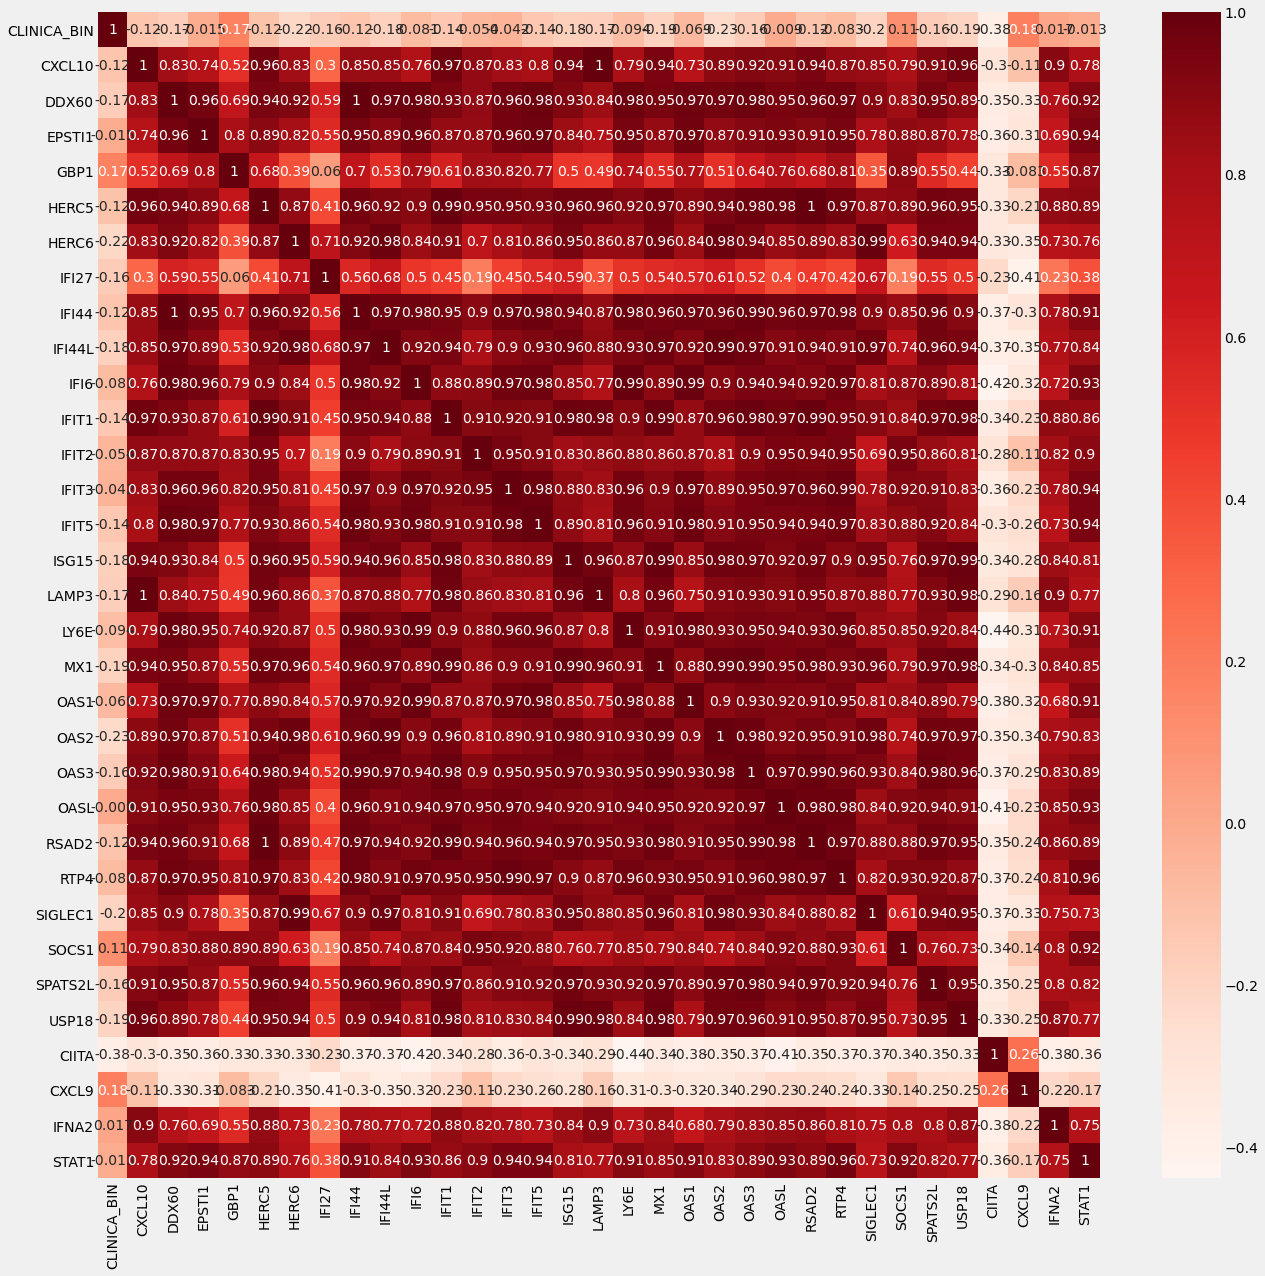

In [10]:
#Using Pearson Correlation

data_ifn_corr = data_ifn[data_ifn.EDAD == "PEDIATRIC"][["CLINICA_BIN","CXCL10","DDX60","EPSTI1","GBP1","HERC5","HERC6","IFI27","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFIT5","ISG15","LAMP3","LY6E","MX1","OAS1","OAS2","OAS3","OASL","RSAD2","RTP4","SIGLEC1","SOCS1","SPATS2L","USP18","CIITA","CXCL9","IFNA2","STAT1"]]

plt.figure(figsize=(20,20))
cor = data_ifn_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor["CLINICA_BIN"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

CIITA          0.375651
CXCL9.1        0.786978
CXCL10.1       0.749668
G-CSF          0.555753
IFN-beta       0.327683
IFN-gamma      0.732986
IL-1 beta      0.745160
IL-1RA         0.676707
IL-2R alpha    0.703186
IL-6           0.582723
IL-8           0.730764
IL-10          0.777045
IL-18          0.733438
MCP-1          0.575137
MCP-3          0.576137
TNF-alpha      0.644453
CLINICA_NUM    0.722507
CLINICA_BIN    1.000000
Name: CLINICA_BIN, dtype: float64

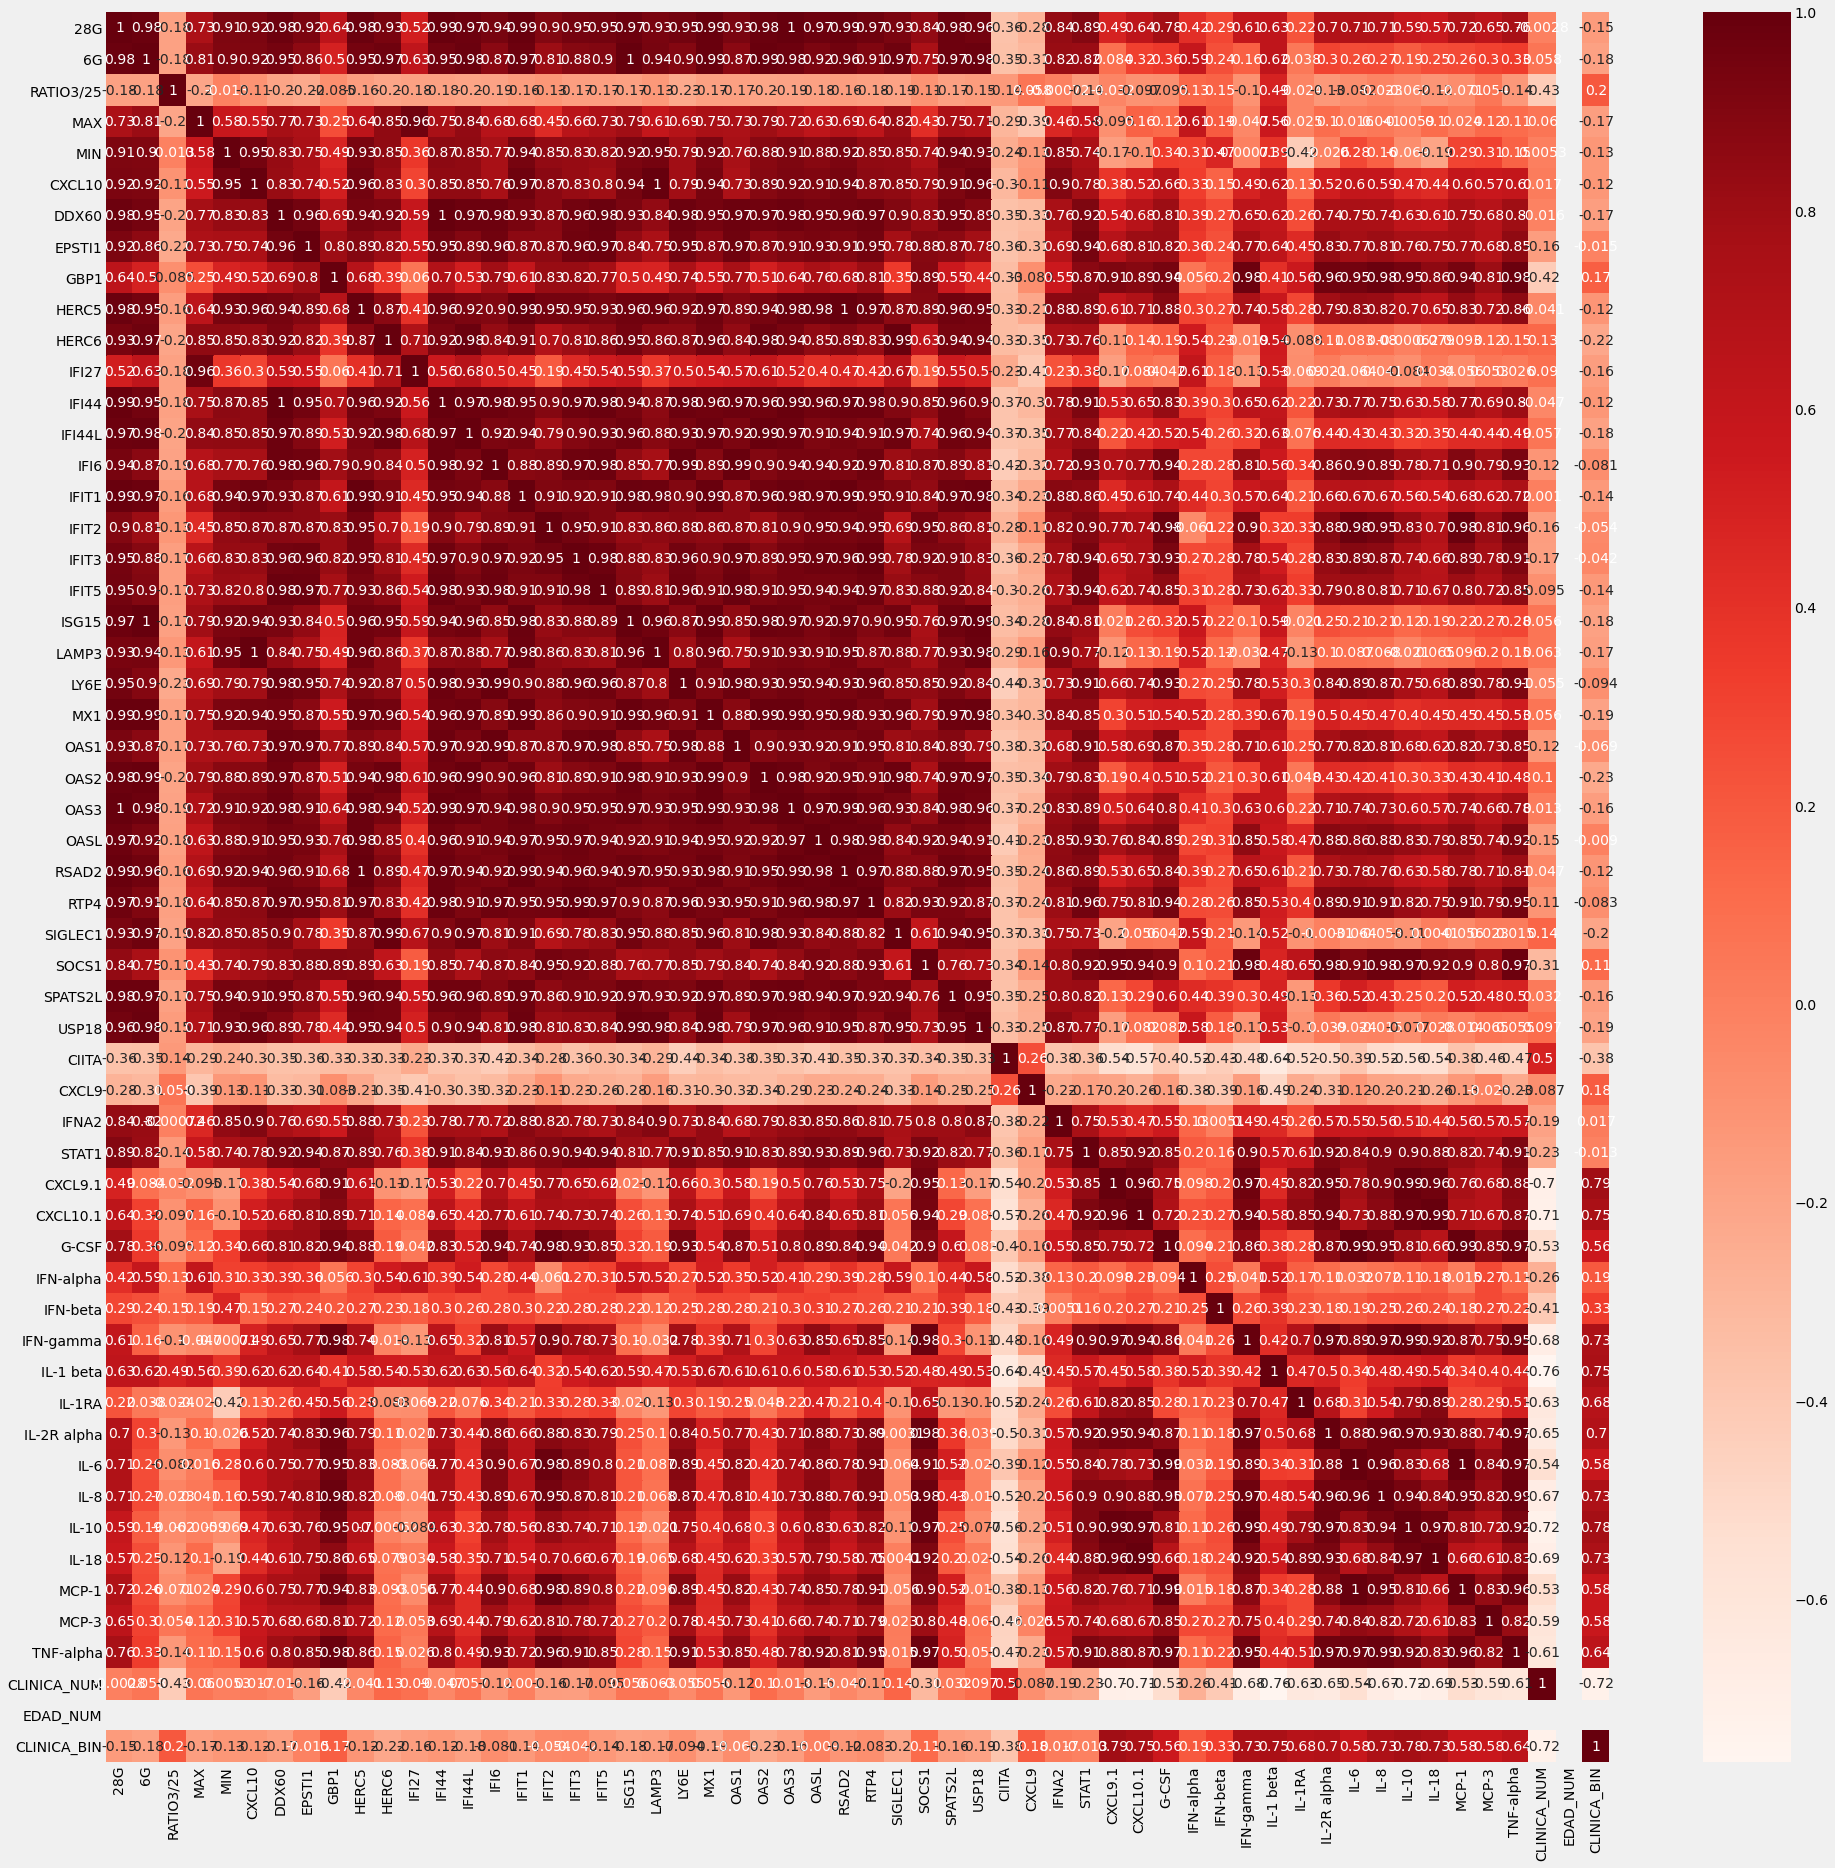

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = data_ifn[data_ifn.EDAD == "PEDIATRIC"].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["CLINICA_NUM"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

RATIO3/25      0.426353
GBP1           0.423497
SOCS1          0.311436
CIITA          0.496562
CXCL9.1        0.701210
CXCL10.1       0.709213
G-CSF          0.526896
IFN-beta       0.406499
IFN-gamma      0.676548
IL-1 beta      0.764209
IL-1RA         0.631603
IL-2R alpha    0.650690
IL-6           0.537713
IL-8           0.668753
IL-10          0.717555
IL-18          0.689535
MCP-1          0.528047
MCP-3          0.594310
TNF-alpha      0.609205
CLINICA_NUM    1.000000
CLINICA_BIN    0.722507
Name: CLINICA_NUM, dtype: float64

Vamos a ver si las variables que nos han dado más correlación con las variables objetivo, están o no correladas entre ellas.

In [17]:
print(data_ifn[["EPSTI1","IFI6"]].corr())

print(data_ifn[["EPSTI1","IFIT3"]].corr())
print(data_ifn[["LY6E","OAS1"]].corr())
print(data_ifn[["OAS1","OASL"]].corr())
print(data_ifn[["EPSTI1","SOCS1"]].corr())
print(data_ifn[["SOCS1","CIITA"]].corr())

print(data_ifn[["SOCS1","HERC6"]].corr())



          EPSTI1      IFI6
EPSTI1  1.000000  0.930979
IFI6    0.930979  1.000000
          EPSTI1     IFIT3
EPSTI1  1.000000  0.953881
IFIT3   0.953881  1.000000
          LY6E      OAS1
LY6E  1.000000  0.928247
OAS1  0.928247  1.000000
          OAS1      OASL
OAS1  1.000000  0.929955
OASL  0.929955  1.000000
          EPSTI1     SOCS1
EPSTI1  1.000000  0.775591
SOCS1   0.775591  1.000000
          SOCS1     CIITA
SOCS1  1.000000 -0.281205
CIITA -0.281205  1.000000
          SOCS1     HERC6
SOCS1  1.000000  0.597175
HERC6  0.597175  1.000000


## ANOVA

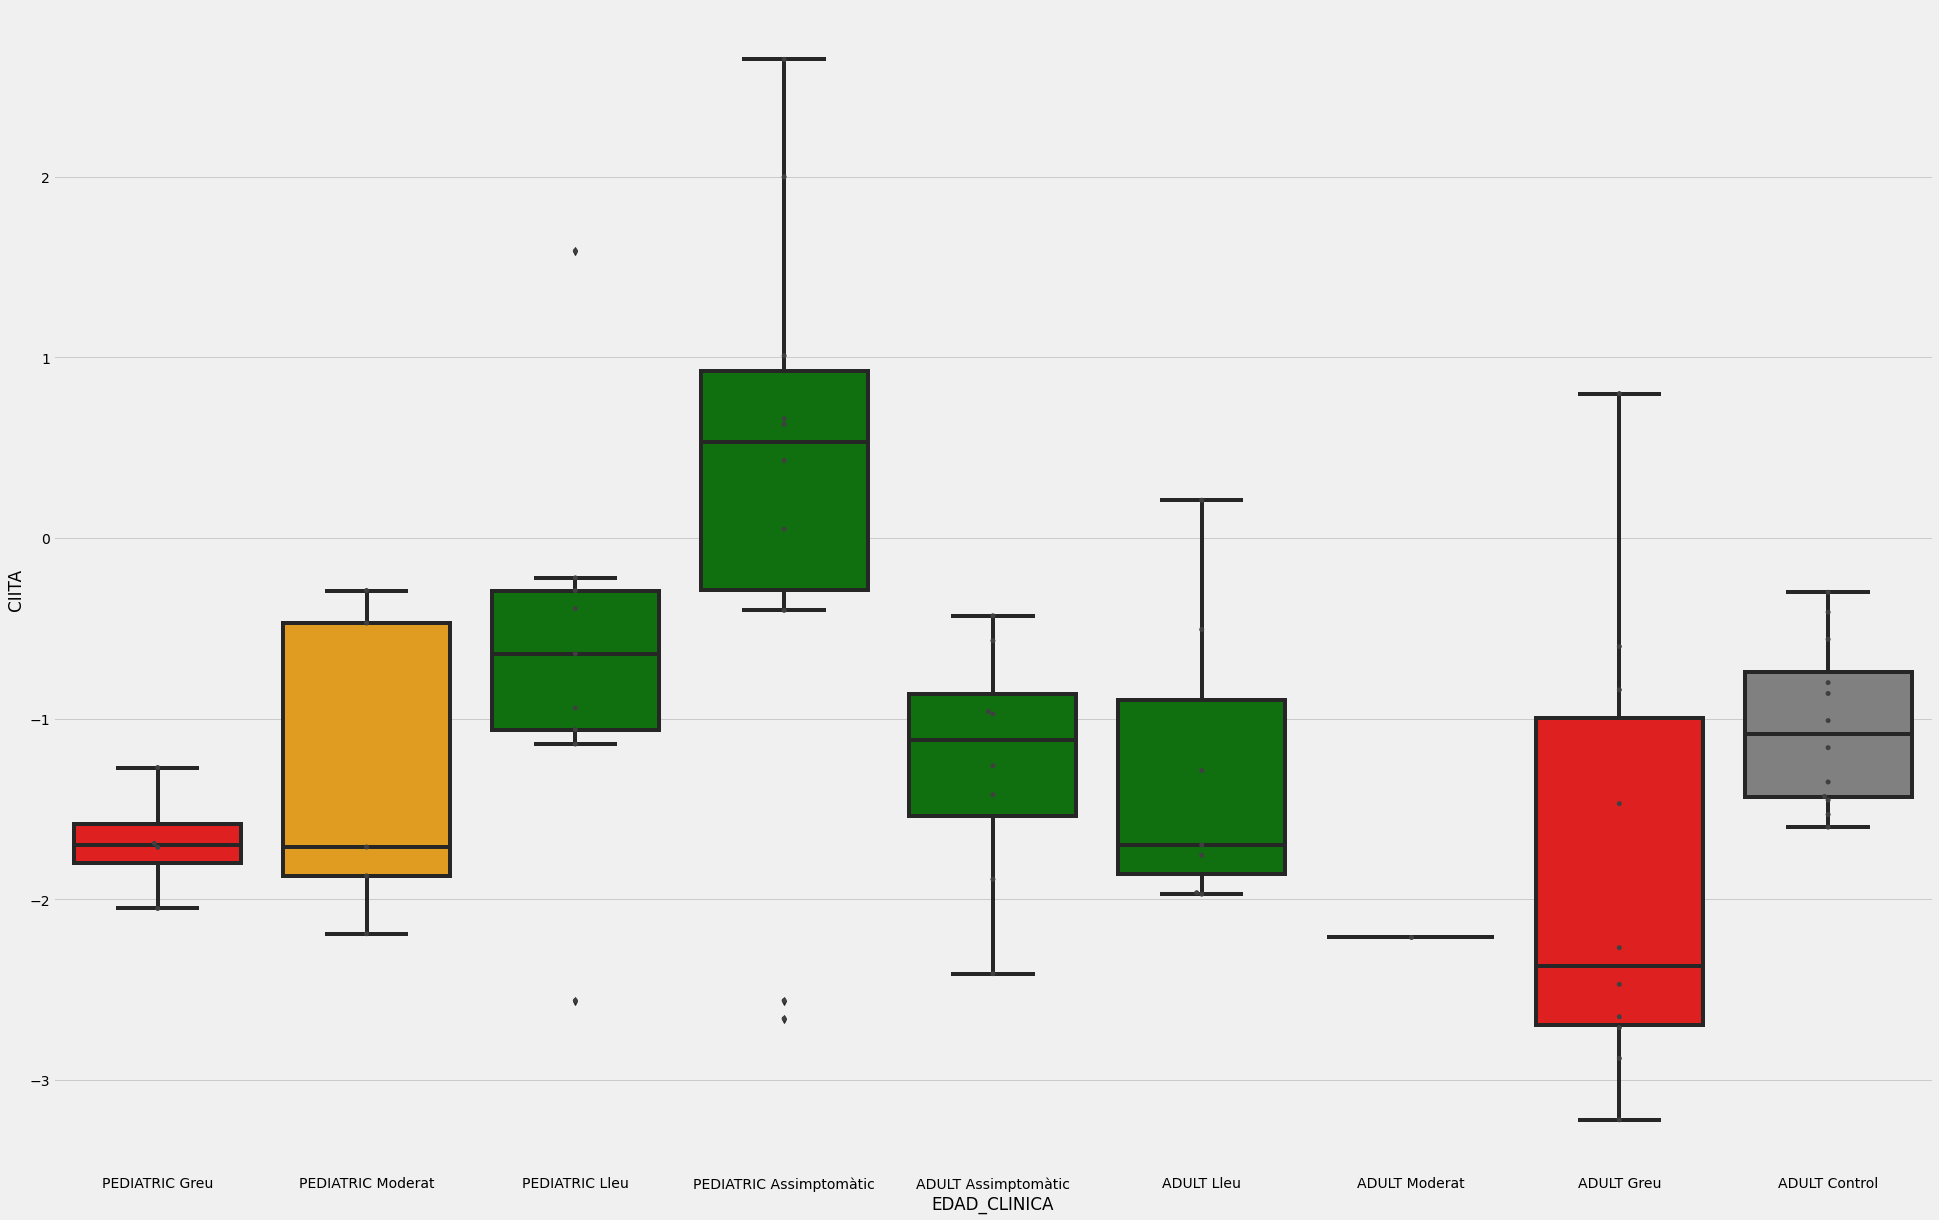

In [22]:
plt.figure(figsize=(30,20))

my_pal = {"PEDIATRIC Greu": "r", "PEDIATRIC Moderat": "orange", "PEDIATRIC Lleu":"g",
         "PEDIATRIC Assimptomàtic": "g", "ADULT Assimptomàtic": "g", "ADULT Moderat":"orange",
         "ADULT Greu": "r", "ADULT Lleu": "g", "ADULT Control": "grey", "GESTANT Greu": "r", "GESTANT Assimptomàtic":"g","ND Control":"grey"}

ax = sns.boxplot(x="EDAD_CLINICA", y="CIITA", data=data_ifn,palette=my_pal)
ax = sns.swarmplot(x="EDAD_CLINICA", y="CIITA", data=data_ifn, color=".25")


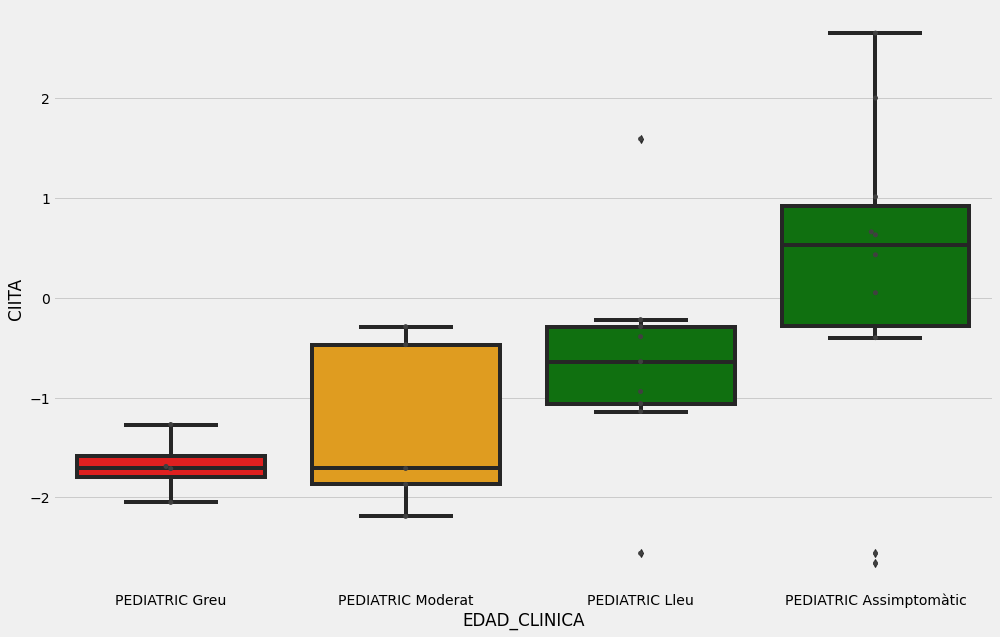

In [23]:
plt.figure(figsize=(15,10))

my_pal = {"PEDIATRIC Greu": "r", "PEDIATRIC Moderat": "orange", "PEDIATRIC Lleu":"g",
         "PEDIATRIC Assimptomàtic": "g", "ADULT Assimptomàtic": "g", "ADULT Moderat":"orange",
         "ADULT Greu": "r", "GESTANT Greu": "r", "GESTANT Assimptomàtic":"g","ND Control":"grey"}

ax = sns.boxplot(x="EDAD_CLINICA", y="CIITA", data=data_ifn[data_ifn.EDAD == "PEDIATRIC"],palette=my_pal)
ax = sns.swarmplot(x="EDAD_CLINICA", y="CIITA", data=data_ifn[data_ifn.EDAD == "PEDIATRIC"], color=".25")

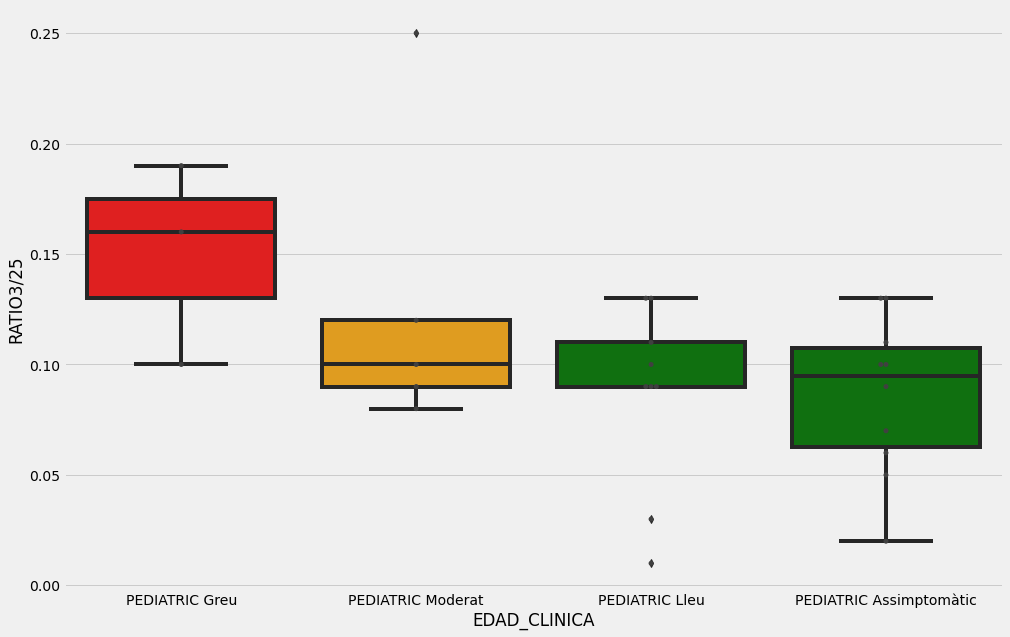

In [73]:
plt.figure(figsize=(15,10))

my_pal = {"PEDIATRIC Greu": "r", "PEDIATRIC Moderat": "orange", "PEDIATRIC Lleu":"g",
         "PEDIATRIC Assimptomàtic": "g", "ADULT Assimptomàtic": "g", "ADULT Moderat":"orange",
         "ADULT Greu": "r", "GESTANT Greu": "r", "GESTANT Assimptomàtic":"g","ND Control":"grey"}

ax = sns.boxplot(x="EDAD_CLINICA", y="RATIO3/25", data=data_ifn[data_ifn.EDAD == "PEDIATRIC"],palette=my_pal)
ax = sns.swarmplot(x="EDAD_CLINICA", y="RATIO3/25", data=data_ifn[data_ifn.EDAD == "PEDIATRIC"], color=".25")

In [26]:
# Importación de librerías para este apartado
import scipy.stats as stats
import statistics
from statsmodels.formula.api import ols

results = ols('EDAD_NUM ~ CIITA ', data=data_ifn).fit()
#results = ols('CLINICA_NUM  ~ CIITA + OASL', data=data_ifn).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               EDAD_NUM   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     7.240
Date:                Wed, 30 Dec 2020   Prob (F-statistic):            0.00908
Time:                        16:58:52   Log-Likelihood:                -43.599
No. Observations:                  66   AIC:                             91.20
Df Residuals:                      64   BIC:                             95.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4350      0.079      5.540      0.000       0.278       0.592
CIITA         -0.1347      0.050     -2.691      0.009      -0.235      -0.035
==============================================================================
Omnibus:                       85.949   Durbin-Watson:                   0.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.903
Skew:                          -0.379   Prob(JB):                       0.0192
Kurtosis:                       1.484   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modelos

## BOX PLOTS

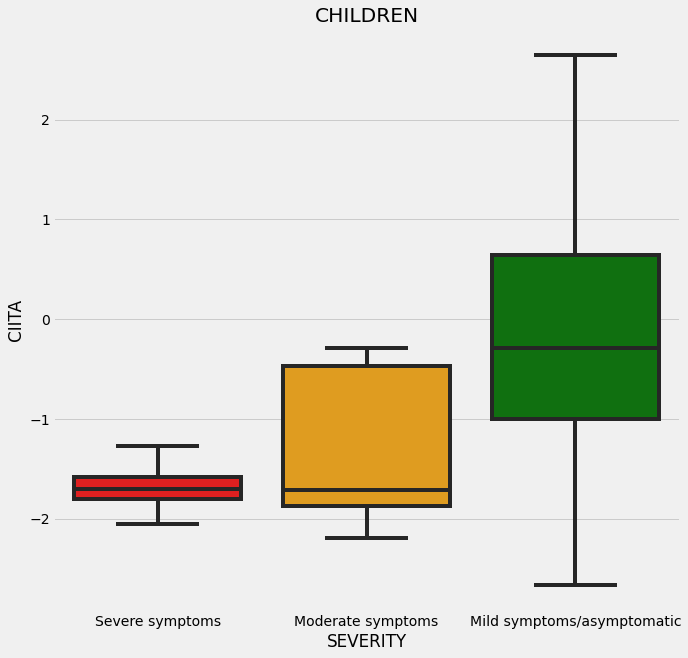

In [28]:
fig = plt.figure(figsize=(10,10))


my_pal = {"Severe symptoms": "r", "Mild symptoms/asymptomatic": "g", "Moderate symptoms": "orange"}



ax = sns.boxplot(x="SEVERITY", y="CIITA", data=data_ifn[data_ifn.EDAD == "PEDIATRIC"],palette=my_pal)
#ax = sns.boxplot(x="SEVERITY", y="SOCS1", data=data_ifn[data_ifn.EDAD == "PEDIATRIC"],palette=my_pal)
plt.title("CHILDREN");

<AxesSubplot:xlabel='SEVERITY', ylabel='CIITA'>

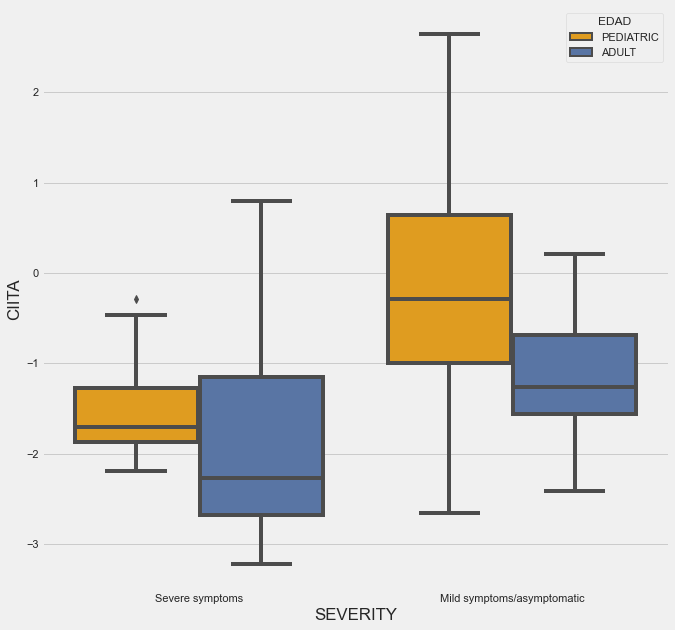

In [624]:
fig = plt.figure(figsize=(10,10))


my_pal = {"Severe symptoms": "r", "Mild symptoms/asymptomatic": "g"}

colors = ['orange','b']


data_ifn.loc[data_ifn['CLINICA_BIN'] == 0, "SEVERITY"] = "Mild symptoms/asymptomatic"
data_ifn.loc[data_ifn['CLINICA_BIN'] == 1, "SEVERITY"] = "Severe symptoms"


sns.boxplot(x="SEVERITY", y="CIITA", 
                 data=data_ifn, 
                 palette=colors,
                 hue='EDAD')



<AxesSubplot:xlabel='SEVERITY', ylabel='SOCS1'>

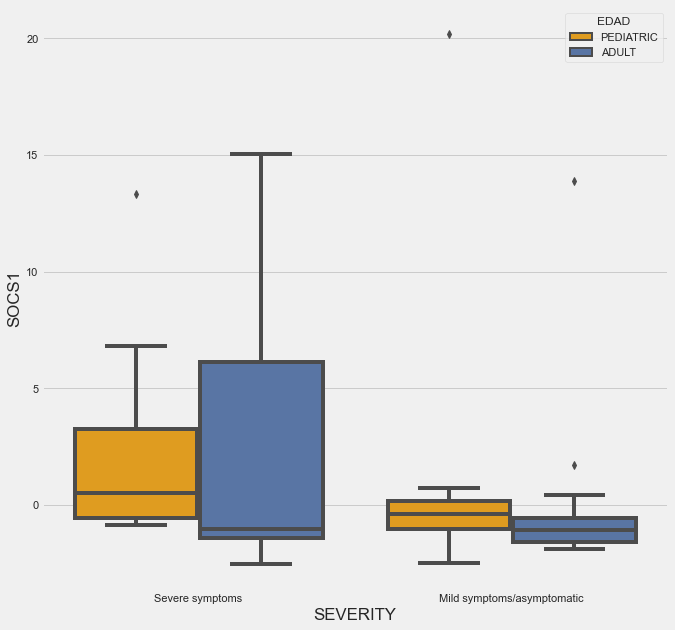

In [625]:
fig = plt.figure(figsize=(10,10))


my_pal = {"Severe symptoms": "r", "Mild symptoms/asymptomatic": "g"}

colors = ['orange','b']


data_ifn.loc[data_ifn['CLINICA_BIN'] == 0, "SEVERITY"] = "Mild symptoms/asymptomatic"
data_ifn.loc[data_ifn['CLINICA_BIN'] == 1, "SEVERITY"] = "Severe symptoms"


sns.boxplot(x="SEVERITY", y="SOCS1", 
                 data=data_ifn, 
                 palette=colors,
                 hue='EDAD')


## DECISIÓN TREES

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

TOP_FEATURES = 15

X_train = data_ifn[data_ifn.EDAD == "PEDIATRIC"].loc[:,data_ifn[data_ifn.EDAD == "PEDIATRIC"].columns != 'SEVERITY'].dropna(axis=1, how='any')._get_numeric_data()

y_train = data_ifn[data_ifn.EDAD == "PEDIATRIC"]["SEVERITY"]

forest = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top features:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

Top features:
1. feature 39 (0.378854)
2. feature 37 (0.238733)
3. feature 33 (0.039416)
4. feature 8 (0.028742)
5. feature 2 (0.025002)
6. feature 30 (0.024125)
7. feature 35 (0.021019)
8. feature 24 (0.020035)
9. feature 20 (0.016389)
10. feature 3 (0.013923)
11. feature 28 (0.012375)
12. feature 26 (0.011258)
13. feature 10 (0.010959)
14. feature 32 (0.010746)
15. feature 34 (0.010409)


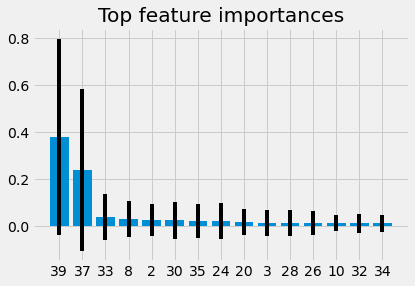

In [64]:
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

In [65]:
X_train.iloc[:,[39,37,33,2,8,30,35,26,28,3,11,20,24,7,32]]

,CLINICA_BIN,CLINICA_NUM,CIITA,RATIO3/25,GBP1,SOCS1,IFNA2,OASL,RTP4,MAX,IFI27,LAMP3,OAS2,EPSTI1,USP18
0,1.0,0.0,-1.690000,0.100000,16.650000,13.340000,0.170000,5.730000,10.420000,16.650000,1.950000,1.720000,7.240000,11.490000,1.580000
1,1.0,0.0,-1.270000,0.160000,0.700000,-0.740000,0.670000,-0.070000,-1.030000,1.260000,0.960000,-0.650000,-1.140000,0.060000,-0.800000
2,1.0,0.0,-2.050000,0.190000,6.330000,6.820000,-0.440000,1.620000,2.090000,6.820000,1.070000,-0.610000,0.260000,4.770000,-0.730000
3,1.0,0.0,-1.711596,1.313128,-0.792028,-0.868237,-0.123902,-1.119552,-1.413937,-1.413937,-0.187296,-0.460879,-0.557943,-0.510165,-0.061214
4,1.0,1.0,-1.710000,0.080000,0.200000,-0.570000,-0.740000,0.220000,-0.840000,13.740000,13.740000,-0.120000,-0.430000,2.280000,-0.170000
5,1.0,1.0,-2.190000,0.090000,1.420000,-0.080000,-1.270000,0.380000,0.700000,5.120000,5.120000,-0.430000,1.020000,2.130000,1.410000
6,1.0,1.0,-1.870000,0.100000,-0.060000,3.280000,0.760000,0.650000,-1.150000,3.280000,2.180000,-0.540000,-0.630000,1.930000,-0.500000
7,1.0,1.0,-0.470000,0.250000,4.070000,2.160000,0.270000,0.320000,0.750000,4.070000,0.230000,-0.240000,-1.300000,1.270000,-0.380000
8,1.0,1.0,-0.290000,0.120000,-1.140000,0.510000,-1.090000,-0.410000,-1.520000,0.510000,-0.270000,-1.070000,-1.200000,-0.350000,-1.220000
9,0.0,2.0,-2.560000,0.030000,11.100000,20.210000,5.630000,14.460000,19.390000,111.040000,52.510000,79.330000,35.660000,15.640000,111.040000


In [66]:
X_train = X_train.iloc[:,[33,26,8,30]]

In [67]:
#train = X_train.iloc[:,[34,27,11,35,8]]

from xgboost import XGBClassifier

m = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=0.1,
    reg_alpha=0.6,
    reg_lambda=0.6
)

m.fit(X_train, y_train)
#m.predict_proba(X_test.iloc[:,[34,27,11,35,8]])[:,1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=2,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

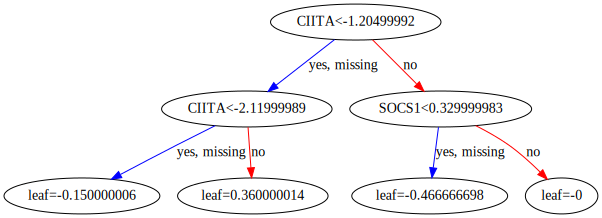

<Figure size 1080x720 with 0 Axes>

In [68]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
import graphviz
import os
import xgboost
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin/'
plt.figure(figsize=(15,10))

os.environ["PATH"] += os.pathsep + 'C:/Users/Guillermo/anaconda3_2020/Library/bin/graphviz/'


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot single tree
#plot_tree(model, num_trees=0, rankdir='LR')
xgboost.to_graphviz(model)


In [47]:
# The decision tree classifier.

X_train = data_ifn.loc[:,data_ifn.columns != 'SEVERITY'].dropna(axis=1, how='any')._get_numeric_data()

y_train = data_ifn["SEVERITY"]

#X_train = X_train.iloc[:,[33,26,8,30]]
X_train = X_train.iloc[:,[33,26]]

#X_train = X_train.drop(columns=["RATIO3/25","MAX","MIN","EDAD_NUM","CLINICA_BIN"])
clf = tree.DecisionTreeClassifier(max_depth=2,min_samples_leaf=3)
# Training the Decision Tree
clf_train = clf.fit(X_train, y_train)


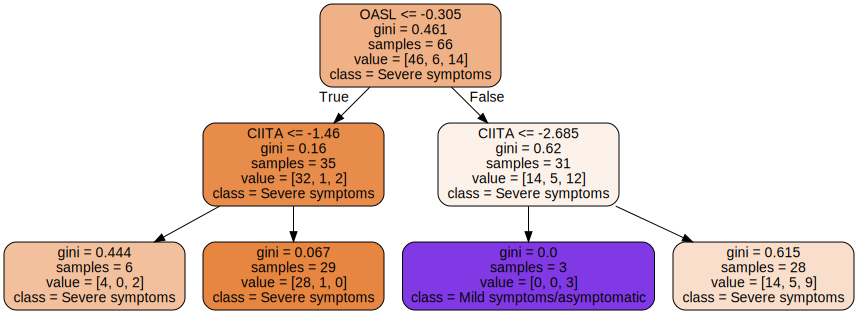

In [48]:

dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X_train.columns.values), 
                                class_names=["Severe symptoms",'Moderate symptoms',"Mild symptoms/asymptomatic"], rounded=True, filled=True); #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes

#Create Graph from DOT data
#gaph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#mage(graph)


graph = graphviz.Source(dot_data)  
graph


In [54]:
# The decision tree classifier.



data_ifn.loc[(data_ifn['CLINICA_BIN'] == 0) & (data_ifn['EDAD'] == "PEDIATRIC"), "SEVERITY COHORT"] = "Pediatric Mild symptoms/asymptomatic"
data_ifn.loc[(data_ifn['CLINICA_BIN'] == 1) & (data_ifn['EDAD'] == "PEDIATRIC"), "SEVERITY COHORT"] = "Pediatric Severe symptoms"

data_ifn.loc[(data_ifn['CLINICA_BIN'] == 0) & (data_ifn['EDAD'] == "ADULT"), "SEVERITY COHORT"] = "Adult Mild symptoms/asymptomatic"
data_ifn.loc[(data_ifn['CLINICA_BIN'] == 1) & (data_ifn['EDAD'] == "ADULT"), "SEVERITY COHORT"] = "Adult Severe symptoms"


X_train = data_ifn.loc[:,data_ifn.columns != 'SEVERITY COHORT'].dropna(axis=1, how='any')._get_numeric_data()

y_train = data_ifn["SEVERITY COHORT"]

#X_train = X_train.iloc[:,[33,26,8,30]]
X_train = X_train.iloc[:,[33,26]]

#X_train = X_train.drop(columns=["RATIO3/25","MAX","MIN","CLINICA_NUM","EDAD_NUM","CLINICA_BIN"])
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
# Training the Decision Tree
clf_train = clf.fit(X_train, y_train)


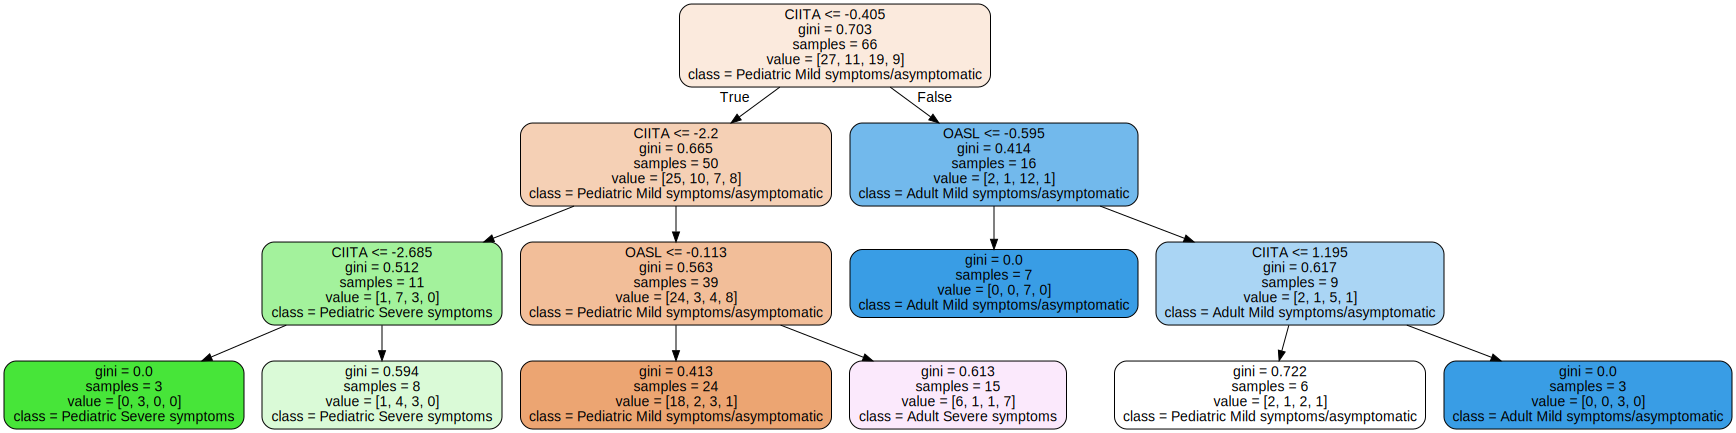

In [55]:
# Export/Print a decision tree in DOT format.
#print(tree.export_graphviz(clf_train, None))



#Create Dot Data
#dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X_train.columns.values), 
 #                               class_names=['Greu', 'Moderat','Lleu','Assimptomàtic','CONTROL'], rounded=True, filled=True); #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes

dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X_train.columns.values), 
                                class_names=["Pediatric Mild symptoms/asymptomatic","Pediatric Severe symptoms",
                                            "Adult Mild symptoms/asymptomatic","Adult Severe symptoms"], rounded=True, filled=True); #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes

#Create Graph from DOT data
#gaph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
#mage(graph)


graph = graphviz.Source(dot_data)  
graph

#graph.render(filename=r'C:\Users\Guillermo\Documents\TFM\TFM\Datos\img/g1.png')

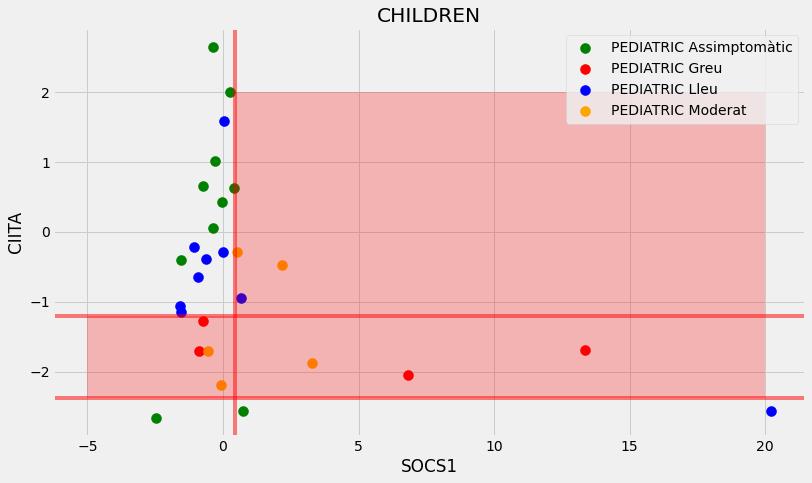

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *

x = np.linspace(0, 10, 1000)

scatter_x = data_ifn[data_ifn.EDAD == "PEDIATRIC"]["SOCS1"].to_numpy()
scatter_y = data_ifn[data_ifn.EDAD == "PEDIATRIC"]["CIITA"].to_numpy()
group = data_ifn[data_ifn.EDAD == "PEDIATRIC"]["EDAD_CLINICA"].str.replace("+"," ").to_numpy()
cdict = {'PEDIATRIC Greu': 'red',
        'PEDIATRIC Moderat': 'orange',
        'PEDIATRIC Lleu': 'blue',
        'PEDIATRIC Assimptomàtic': 'green'
        }

mapping = {'PEDIATRIC Greu': 'o',
        'PEDIATRIC Moderat': 'o',
        'PEDIATRIC Lleu': 'o',
        'PEDIATRIC Assimptomàtic': 'o'
          }


fig, ax = plt.subplots(figsize=(12,7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],c = cdict[g], label = g,marker=mapping[g], s = 100)
ax.legend()
ax.set_ylabel('CIITA')
ax.set_xlabel('SOCS1')
plt.axvline(x=0.45,c="r",alpha = 0.5)
plt.axhline(y=-2.375,c="r",alpha = 0.5)
plt.axhline(y=-1.205,c="r",alpha = 0.5)
ax.fill_between([-5, 20], -2.375, -1.205, facecolor ='r', alpha = 0.25) 
ax.fill_between([0.45, 20], -1.205, 2, facecolor ='r', alpha = 0.25) 
plt.title("CHILDREN")

plt.show()

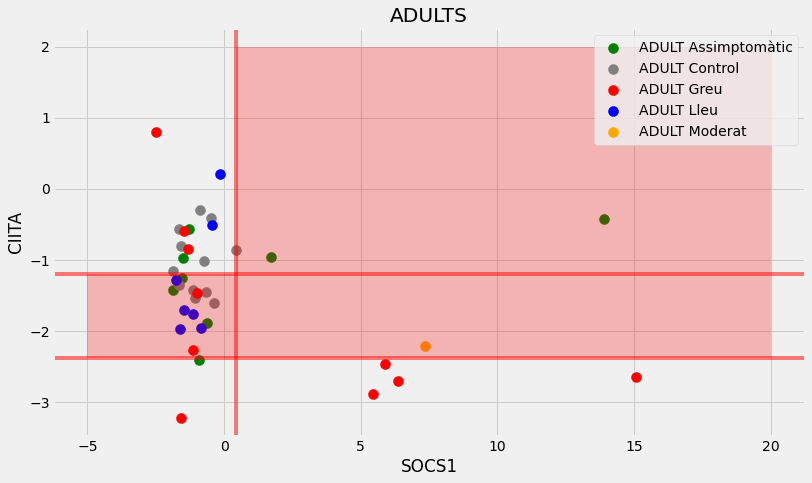

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *

x = np.linspace(0, 10, 1000)

scatter_x = data_ifn[data_ifn.EDAD == "ADULT"]["SOCS1"].to_numpy()
scatter_y = data_ifn[data_ifn.EDAD == "ADULT"]["CIITA"].to_numpy()
group = data_ifn[data_ifn.EDAD == "ADULT"]["EDAD_CLINICA"].str.replace("+"," ").to_numpy()
cdict = {'ADULT Greu': 'red',
        'ADULT Moderat': 'orange',
        'ADULT Lleu': 'blue',
        'ADULT Assimptomàtic': 'green',
        'ADULT Control': 'grey'
        }

mapping = {'ADULT Greu': 'o',
        'ADULT Moderat': 'o',
        'ADULT Lleu': 'o',
        'ADULT Assimptomàtic': 'o',
           'ADULT Control': 'o' }


fig, ax = plt.subplots(figsize=(12,7))
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix],c = cdict[g], label = g,marker=mapping[g], s = 100)
ax.legend()
ax.set_ylabel('CIITA')
ax.set_xlabel('SOCS1')
plt.axvline(x=0.45,c="r",alpha = 0.5)
plt.axhline(y=-2.375,c="r",alpha = 0.5)
plt.axhline(y=-1.205,c="r",alpha = 0.5)
ax.fill_between([-5, 20], -2.375, -1.205, facecolor ='r', alpha = 0.25) 
ax.fill_between([0.45, 20], -1.205, 2, facecolor ='r', alpha = 0.25) 
plt.title("ADULTS")

plt.show()

## HEATMAP

In [184]:
data_ifn_heat = data_ifn[data_ifn.EDAD == "PEDIATRIC"]._get_numeric_data()

In [185]:
data_ifn_heat = data_ifn_heat.drop(columns=['28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha', 'tropo', 'proBNP','CXCL9.1','CXCL10.1','G-CSF'])

In [146]:
data_ifn_heat.head()

,CXCL10,DDX60,EPSTI1,GBP1,HERC5,HERC6,IFI27,IFI44,IFI44L,IFI6,...,RTP4,SIGLEC1,SOCS1,SPATS2L,USP18,CIITA,CXCL9,IFNA2,STAT1,CLINICA_NUM
0,4.160000,8.310000,11.490000,16.650000,3.390000,1.220000,1.950000,6.680000,5.630000,12.870000,...,10.420000,-0.170000,13.340000,3.590000,1.580000,-1.690000,0.060000,0.170000,6.850000,0.0
1,1.260000,-0.750000,0.060000,0.700000,-0.700000,-0.670000,0.960000,-0.390000,-0.530000,-0.780000,...,-1.030000,-0.610000,-0.740000,-0.940000,-0.800000,-1.270000,0.020000,0.670000,0.300000,0.0
2,0.790000,1.300000,4.770000,6.330000,0.040000,-1.030000,1.070000,0.560000,0.130000,1.920000,...,2.090000,-0.830000,6.820000,-2.740000,-0.730000,-2.050000,-0.330000,-0.440000,3.620000,0.0
3,1.313128,-0.681973,-0.510165,-0.792028,-0.778594,-0.701504,-0.187296,-0.270625,-0.495381,-0.932164,...,-1.413937,-0.437262,-0.868237,-0.880955,-0.061214,-1.711596,0.213559,-0.123902,-0.681953,0.0
4,1.980000,-0.420000,2.280000,0.200000,-0.550000,0.540000,13.740000,-0.160000,-0.190000,-0.600000,...,-0.840000,-0.510000,-0.570000,-0.150000,-0.170000,-1.710000,1.250000,-0.740000,-0.470000,1.0


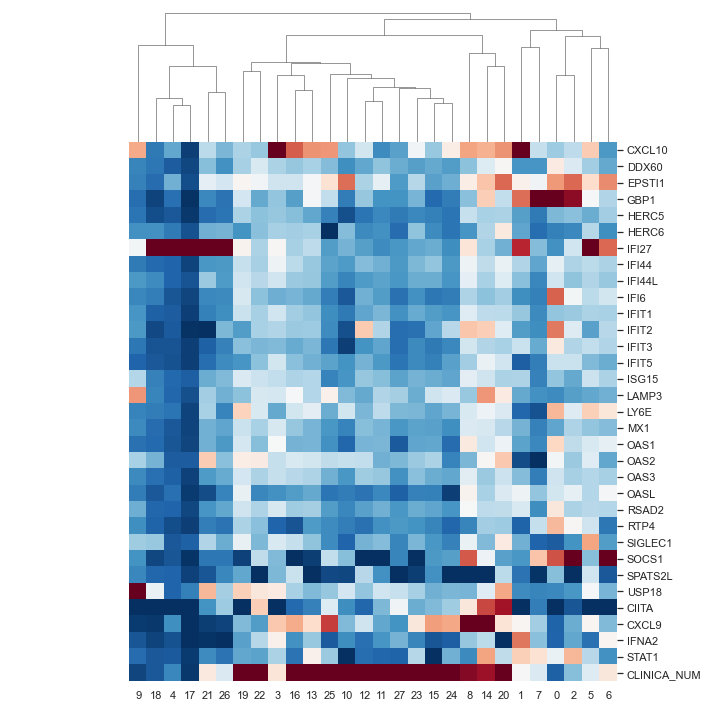

In [198]:
sb.clustermap(data_ifn_heat.T,standard_scale=1,cmap="RdBu_r" ,row_cluster= False,xticklabels=True,col_cluster=True ,
             cbar_pos = None)


In [221]:
data_ifn_heat = data_ifn._get_numeric_data()

data_ifn_heat = data_ifn_heat.drop(columns=['28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha', 'tropo', 'proBNP','CXCL9.1','CXCL10.1','G-CSF'])

data_ifn_heat = data_ifn_heat.sort_values(by=['CLINICA_NUM'])

In [219]:
data_ifn_heat = data_ifn._get_numeric_data()

data_ifn_heat = data_ifn_heat.drop(columns=['28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN', 'tropo', 'proBNP'])

data_ifn_heat = data_ifn_heat.sort_values(by=['CLINICA_NUM'])

In [475]:
data_ifn_heat =  data_ifn._get_numeric_data()

data_ifn_heat = data_ifn_heat.drop(columns=['28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha', 'tropo', 'proBNP','CXCL9.1','CXCL10.1','G-CSF'])

normalized_df = StandardScaler().fit_transform(data_ifn_heat)

In [477]:
normalized_df

,CXCL10,DDX60,EPSTI1,GBP1,HERC5,HERC6,IFI27,IFI44,IFI44L,IFI6,...,RTP4,SIGLEC1,SOCS1,SPATS2L,USP18,CIITA,CXCL9,IFNA2,STAT1,CLINICA_NUM
0,-0.020022,1.819213,1.954589,2.252893,1.242399,-0.006382,-0.240971,1.443597,0.731462,2.777741,...,1.816148,-0.313469,2.866831,0.598481,-0.154013,-0.551804,-0.292933,0.230279,1.632409,-1.528982
1,-0.222455,-0.517776,-0.483619,-0.233688,-0.431576,-0.407546,-0.260364,-0.433619,-0.393694,-0.443982,...,-0.416139,-0.366555,-0.358808,-0.351549,-0.305112,-0.192646,-0.311660,0.555437,-0.253369,-1.528982
2,-0.255263,0.011013,0.521102,0.644021,-0.128705,-0.483958,-0.258209,-0.181377,-0.273142,0.193282,...,0.192135,-0.393098,1.373140,-0.729045,-0.300668,-0.859653,-0.475521,-0.166414,0.702475,-1.528982
3,-0.218746,-0.500229,-0.605245,-0.466293,-0.463744,-0.414233,-0.282837,-0.401923,-0.387371,-0.479896,...,-0.490991,-0.345714,-0.388187,-0.339167,-0.258209,-0.570271,-0.221040,0.039149,-0.536078,-1.528982
4,-0.172196,-0.432654,-0.010056,-0.311637,-0.370183,-0.150716,-0.010026,-0.372550,-0.331591,-0.401498,...,-0.379097,-0.354490,-0.319862,-0.185871,-0.265115,-0.568906,0.264197,-0.361509,-0.475056,-0.808176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.218964,-0.466187,-0.641473,-0.445710,-0.390648,-0.258966,-0.289550,-0.412378,-0.395521,-0.467584,...,-0.416139,-0.348458,-0.429827,-0.506742,-0.311461,-0.414982,-0.068208,-0.231446,-0.457782,1.354241
62,-0.069583,-0.215980,-0.381227,0.009514,-0.210562,-0.182554,-0.286024,-0.284929,-0.295060,-0.309448,...,-0.221179,-0.274861,-0.093060,-0.223620,-0.248609,0.157961,0.240788,-0.498076,0.138182,1.354241
63,-0.154046,-0.275307,-0.483619,-0.098056,-0.116427,-0.089162,-0.283478,-0.271653,-0.304193,-0.278765,...,-0.303062,-0.251937,-0.271753,-0.169093,-0.267020,-0.474841,-0.133753,0.119725,0.043173,1.354241
64,-0.235019,-0.334635,-0.545481,-0.361524,-0.390648,-0.174064,-0.287396,-0.457516,-0.404654,-0.491187,...,-0.429786,-0.371381,-0.450446,-0.366230,-0.305747,-0.329468,0.357832,-0.764705,-0.460661,1.354241


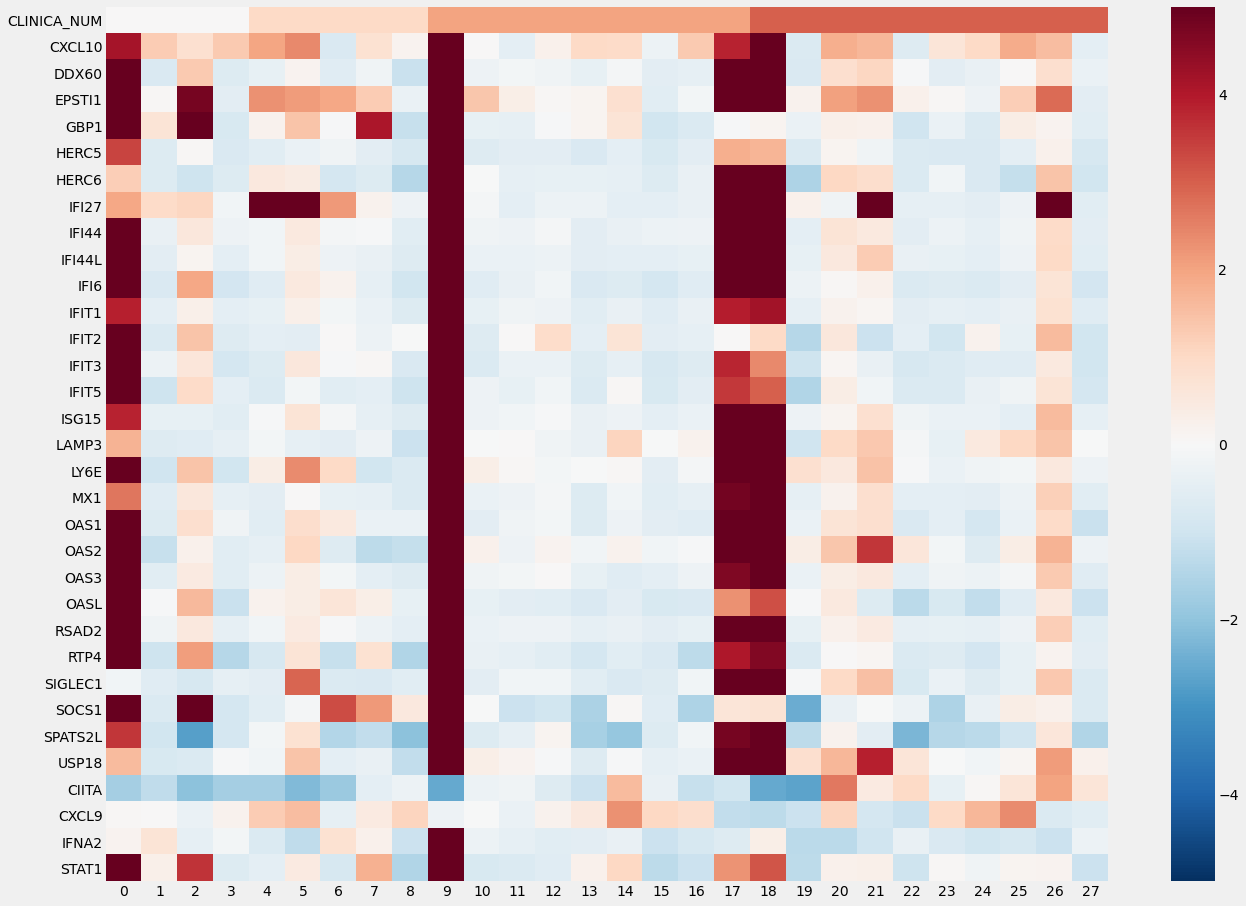

In [76]:
f, ax = plt.subplots(figsize=(20, 15))

data_ifn_heat =  data_ifn._get_numeric_data()


data_ifn_heat = data_ifn[data_ifn.EDAD == "PEDIATRIC"][["CLINICA_NUM","CXCL10","DDX60","EPSTI1","GBP1","HERC5","HERC6","IFI27","IFI44","IFI44L","IFI6","IFIT1","IFIT2","IFIT3","IFIT5","ISG15","LAMP3","LY6E","MX1","OAS1","OAS2","OAS3","OASL","RSAD2","RTP4","SIGLEC1","SOCS1","SPATS2L","USP18","CIITA","CXCL9","IFNA2","STAT1"]].sort_values(by=['CLINICA_NUM'])

#normalized_df = StandardScaler().fit_transform(data_ifn_heat)

#normalized_df = pd.DataFrame(normalized_df,columns = data_ifn_heat.columns)

normalized_df = data_ifn_heat.sort_values(by=['CLINICA_NUM']).T

sns.heatmap(normalized_df, cmap='RdBu_r', cbar=True, robust=True, vmin=-5, vmax=5, center= 0);


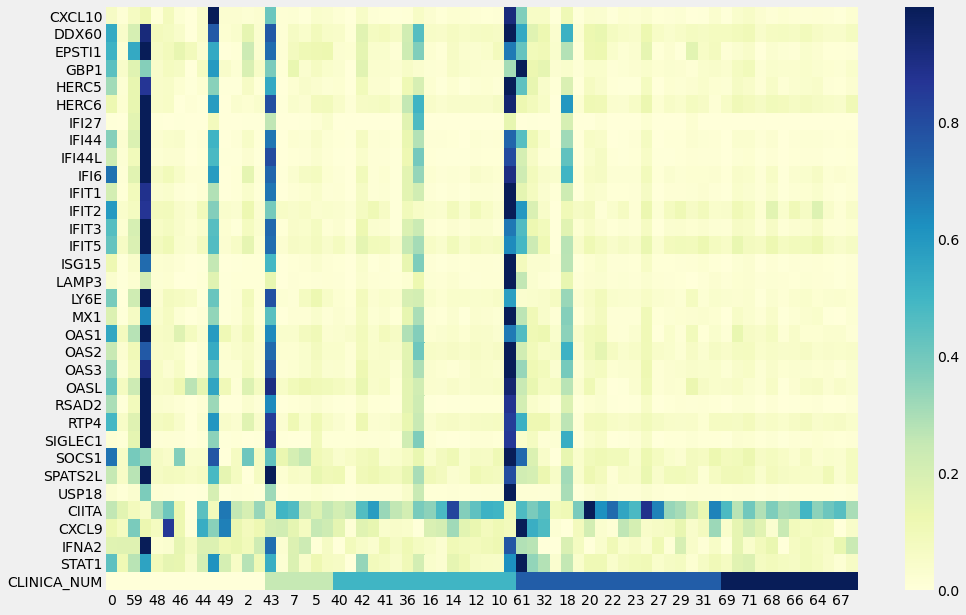

In [78]:
# libraries
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

f, ax = plt.subplots(figsize=(15, 10))

data_ifn_heat =  data_ifn._get_numeric_data()

data_ifn_heat = data_ifn_heat.drop(columns=['28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha','CXCL9.1','CXCL10.1','G-CSF'])

data_ifn_heat = data_ifn_heat.sort_values(by=['CLINICA_NUM'])

normalized_df=(data_ifn_heat-data_ifn_heat.min())/(data_ifn_heat.max()-data_ifn_heat.min())

sns.heatmap(normalized_df.T, cmap='YlGnBu', cbar=True, robust=True, center =0.5);


## PCA

In [319]:
data_ifn

,ID_PACIENTE,CLINICA,EDAD,28G,6G,RATIO3/25,MAX,MIN,CXCL10,DDX60,...,data_altauci,data_altahospital,dx_alta,Unnamed: 153,tropo,proBNP,CLINICA_NUM,EDAD_NUM,EDAD_CLINICA,CLINICA_BIN
0,COVID-958,Greu,PEDIATRIC,5.680000,3.860000,0.100000,16.650000,-0.170000,4.160000,8.310000,...,13/05/2020,21/05/2020,NaN,NaN,NaN,NaN,0.0,0.0,PEDIATRIC Greu,1.0
1,COVID-1033,Greu,PEDIATRIC,-0.630000,-0.450000,0.160000,1.260000,-1.140000,1.260000,-0.750000,...,05/05/2020,11/05/2020,NaN,NaN,NaN,NaN,0.0,0.0,PEDIATRIC Greu,1.0
2,COVID-658,Greu,PEDIATRIC,0.580000,0.200000,0.190000,6.820000,-2.740000,0.790000,1.300000,...,2020-05-11 00:00:00,2020-05-14 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,PEDIATRIC Greu,1.0
3,COVID-3410,Greu,PEDIATRIC,-0.559296,-0.472989,1.313128,-1.413937,0.116345,1.313128,-0.681973,...,2020-06-08 00:00:00,2020-06-15 00:00:00,NaN,NaN,3.7,22668.0,0.0,0.0,PEDIATRIC Greu,1.0
4,COVID-246,Moderat,PEDIATRIC,-0.250000,-0.180000,0.080000,13.740000,-0.840000,1.980000,-0.420000,...,.,11/04/2020,Neumonía COVID-19,NaN,NaN,NaN,1.0,0.0,PEDIATRIC Moderat,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,COVID-603,Control,ADULT,-0.560000,-0.500000,0.130000,1.310000,-1.680000,1.310000,-0.550000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0
71,COVID-379,Control,ADULT,0.140000,0.070000,0.140000,3.450000,-0.790000,3.450000,0.420000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0
72,COVID-380,Control,ADULT,0.130000,0.030000,0.110000,2.240000,-0.470000,2.240000,0.190000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0
73,COVID-376,Control,ADULT,-0.560000,-0.560000,0.140000,1.080000,-1.240000,1.080000,-0.040000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0


In [79]:
data_ifn.reset_index()._get_numeric_data().drop(columns=['index','28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha','CXCL9.1','CXCL10.1','G-CSF','CLINICA_NUM']).columns

Index(['CXCL10', 'DDX60', 'EPSTI1', 'GBP1', 'HERC5', 'HERC6', 'IFI27', 'IFI44',
       'IFI44L', 'IFI6', 'IFIT1', 'IFIT2', 'IFIT3', 'IFIT5', 'ISG15', 'LAMP3',
       'LY6E', 'MX1', 'OAS1', 'OAS2', 'OAS3', 'OASL', 'RSAD2', 'RTP4',
       'SIGLEC1', 'SOCS1', 'SPATS2L', 'USP18', 'CIITA', 'CXCL9', 'IFNA2',
       'STAT1'],
      dtype='object')

In [83]:
data_ifn

,ID_PACIENTE,CLINICA,EDAD,28G,6G,RATIO3/25,MAX,MIN,CXCL10,DDX60,...,IL-18,MCP-1,MCP-3,TNF-alpha,CLINICA_NUM,EDAD_NUM,EDAD_CLINICA,CLINICA_BIN,SEVERITY,SEVERITY COHORT
0,COVID-958,Greu,PEDIATRIC,5.680000,3.860000,0.100000,16.650000,-0.170000,4.160000,8.310000,...,2989.174668,9577.675096,177.440168,79.631427,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms,Pediatric Severe symptoms
1,COVID-1033,Greu,PEDIATRIC,-0.630000,-0.450000,0.160000,1.260000,-1.140000,1.260000,-0.750000,...,NaN,NaN,NaN,NaN,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms,Pediatric Severe symptoms
2,COVID-658,Greu,PEDIATRIC,0.580000,0.200000,0.190000,6.820000,-2.740000,0.790000,1.300000,...,3437.374617,844.115603,58.200000,29.141304,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms,Pediatric Severe symptoms
3,COVID-3410,Greu,PEDIATRIC,-0.559296,-0.472989,1.313128,-1.413937,0.116345,1.313128,-0.681973,...,130.712943,297.152384,58.200000,2.122418,0.0,0.0,PEDIATRIC Greu,1.0,Severe symptoms,Pediatric Severe symptoms
4,COVID-246,Moderat,PEDIATRIC,-0.250000,-0.180000,0.080000,13.740000,-0.840000,1.980000,-0.420000,...,NaN,NaN,NaN,NaN,1.0,0.0,PEDIATRIC Moderat,1.0,Severe symptoms,Pediatric Severe symptoms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,COVID-603,Control,ADULT,-0.560000,-0.500000,0.130000,1.310000,-1.680000,1.310000,-0.550000,...,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic,Adult Mild symptoms/asymptomatic
71,COVID-379,Control,ADULT,0.140000,0.070000,0.140000,3.450000,-0.790000,3.450000,0.420000,...,286.054819,155.781993,58.200000,2.479498,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic,Adult Mild symptoms/asymptomatic
72,COVID-380,Control,ADULT,0.130000,0.030000,0.110000,2.240000,-0.470000,2.240000,0.190000,...,NaN,NaN,NaN,NaN,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic,Adult Mild symptoms/asymptomatic
73,COVID-376,Control,ADULT,-0.560000,-0.560000,0.140000,1.080000,-1.240000,1.080000,-0.040000,...,373.170847,355.783770,58.200000,4.991038,4.0,1.0,ADULT Control,0.0,Mild symptoms/asymptomatic,Adult Mild symptoms/asymptomatic


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x =  StandardScaler().fit_transform(data_ifn[data_ifn["EDAD"]=="PEDIATRIC"].reset_index()._get_numeric_data().drop(columns=['index','28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha','CXCL9.1','CXCL10.1','G-CSF','CLINICA_NUM']))

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data_ifn[data_ifn["EDAD"]=="PEDIATRIC"].reset_index()[['CLINICA_NUM']]], axis = 1)
#finalDf = finalDf.dropna()

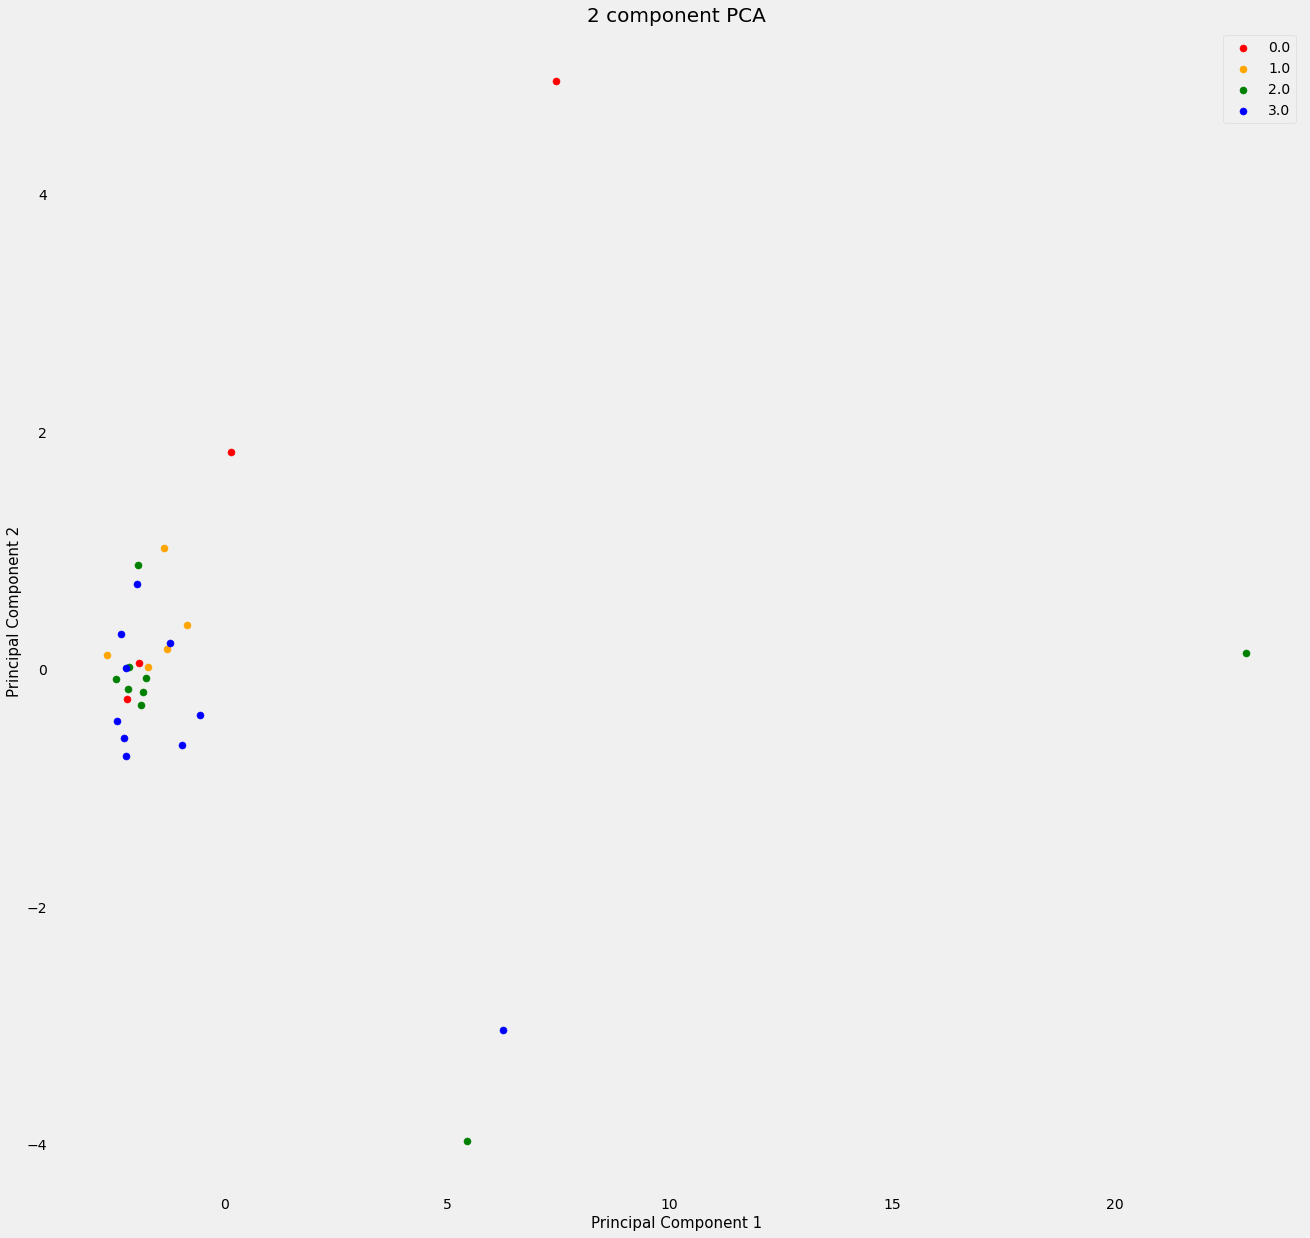

In [87]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf['CLINICA_NUM'].unique()
colors = ['r', 'orange', 'g','b', 'grey', 'g', 'orange','r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CLINICA_NUM'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [787]:
pca_tsne = StandardScaler().fit_transform(data_ifn.reset_index()._get_numeric_data().drop(columns=['index','28G', '6G','RATIO3/25', 'MAX', 'MIN', 'EDAD_NUM',
       'CLINICA_BIN','IFN-alpha', 'IFN-beta',
       'IFN-gamma', 'IL-1 beta', 'IL-1RA', 'IL-2R alpha', 'IL-6', 'IL-8',
       'IL-10', 'IL-18', 'MCP-1', 'MCP-3', 'TNF-alpha','CXCL9.1','CXCL10.1','G-CSF','CLINICA_NUM']))

pca_tsne = pd.DataFrame(data=pca_tsne)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=5000)
tsne_results = tsne.fit_transform(pca_tsne)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
pca_tsne = pd.concat([pca_tsne, data_ifn.reset_index()._get_numeric_data()[['CLINICA_NUM']]], axis = 1)


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 66 samples in 0.000s...
[t-SNE] Computed neighbors for 66 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 66 / 66
[t-SNE] Mean sigma: 0.355495
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.052498
[t-SNE] KL divergence after 3300 iterations: 0.533262
t-SNE done! Time elapsed: 1.3234431743621826 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

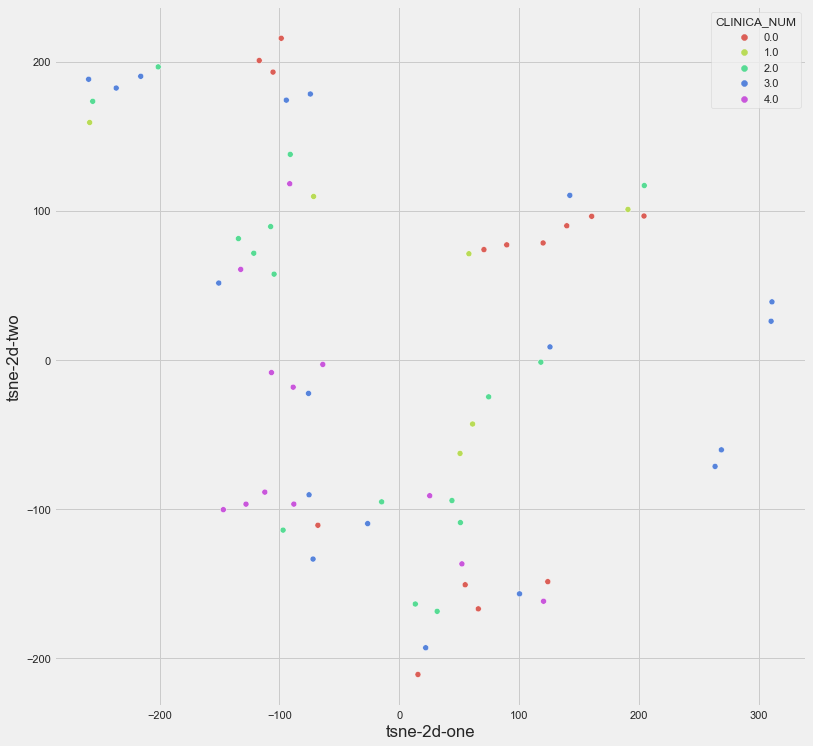

In [788]:
pca_tsne['tsne-2d-one'] = tsne_results[:,0]
pca_tsne['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(12,12))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="CLINICA_NUM",
    palette=sns.color_palette("hls", 5),
    data=pca_tsne,
    legend="full",
    alpha=1
)